# Attribute importance ranking for synthetic data with known change points
The process change points are known. Hence, no change point detection algorithm needs to be used.

In [1]:
import pm4py
import helper
from concept_drift import windows
from concept_drift import statistical_tests
import pandas as pd

In [2]:
data_file_path = 'data/synthetic/maardji et al 2013_xes_attributes/logs/ROI/ROI2.5k.xes'

## Load an event log

In [3]:
# Display the data info
data_info = helper.get_data_information(data_file_path)
data_info

change_points = data_info['change_points']

In [4]:
# load the event log into pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply(data_file_path)

C:\Users\Lennart\Tools\Anaconda3\envs\concept_drift\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|███████████████████████████████████████████| 2500/2500 [00:01<00:00, 1330.53it/s]


In [35]:
# create windows of log and perform KS test in each window
window_size = 50
window_offset = window_size
slide_by = 1
log_windows = windows.get_log_windows(log, window_size, window_offset=window_offset, slide_by=slide_by, start=None, end=None, inclusion_criteria='events', type=None)

In [36]:
start_before_cp = 100 # look at 100 traces before each changepoint

In [37]:
# test each attribute for each log window
test_results = {}
for cp in change_points:
    test_results[cp] = {}
    
    # get all windows that have their start between (cp - start_before_cp) and cp
    relevant_windows_start = cp - start_before_cp
    if relevant_windows_start < 0: relevant_windows_start = 0
    relevant_windows_end = cp
    
    relevant_windows = {key: log_windows[key] for key in log_windows.keys() if (key >= relevant_windows_start) and (key <=relevant_windows_end)}
    
    for start, (window_a, window_b) in relevant_windows.items():
        test_results[cp][start] = {}
        
        attributes_window_a = helper.get_trace_attributes(window_a)
        attributes_window_b = helper.get_trace_attributes(window_b)
        
        # perform statistical test for each attribute
        # TODO handle the case that an attribute is not present in a given window
        for attribute_name, data_series_a in attributes_window_a.items():
            data_series_b = attributes_window_b[attribute_name]
            test_result = statistical_tests.test_chi_squared(data_series_a, data_series_b)
            test_results[cp][start][attribute_name] = test_result

In [52]:
results_df = pd.DataFrame().from_dict(test_results[1250], orient='index')

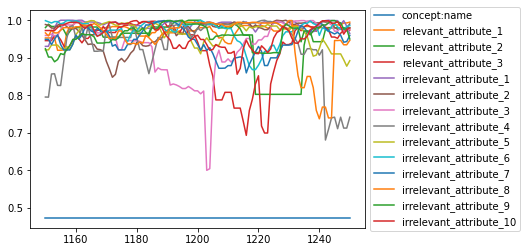

In [53]:
results_df.plot()
import matplotlib.pyplot as plt
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [68]:
import numpy as np
threshold = 0.05
# per change point, investigate which attribute was longest under a significance threshold of 0.05
for change_point, results in test_results.items():
    results_df = pd.DataFrame().from_dict(results, orient='index')
    
    # get dataframe as True/False matrix. True indicates that the statistical test resulted with p < threshold
    test_under_threshold_df = results_df < threshold
    
    # count the number of consecutive Trues
    # see https://stackoverflow.com/a/52718619
    b = test_under_threshold_df.cumsum()
    c = b.sub(b.mask(test_under_threshold_df).ffill().fillna(0)).astype(int)

    mask = test_under_threshold_df.any()
    length = np.where(mask, c.max(), -1).tolist()
    counts =  np.where(mask, c.idxmax().sub(c.max()).add(1), 0).tolist()
    
    display(pd.Series(data=counts, index=results_df.columns))

concept:name               0
relevant_attribute_1       0
relevant_attribute_2       0
relevant_attribute_3       0
irrelevant_attribute_1     0
irrelevant_attribute_2     0
irrelevant_attribute_3     0
irrelevant_attribute_4     0
irrelevant_attribute_5     0
irrelevant_attribute_6     0
irrelevant_attribute_7     0
irrelevant_attribute_8     0
irrelevant_attribute_9     0
irrelevant_attribute_10    0
dtype: int64

concept:name                 0
relevant_attribute_1         0
relevant_attribute_2       410
relevant_attribute_3         0
irrelevant_attribute_1       0
irrelevant_attribute_2       0
irrelevant_attribute_3       0
irrelevant_attribute_4       0
irrelevant_attribute_5       0
irrelevant_attribute_6       0
irrelevant_attribute_7       0
irrelevant_attribute_8       0
irrelevant_attribute_9       0
irrelevant_attribute_10      0
dtype: int64

concept:name               0
relevant_attribute_1       0
relevant_attribute_2       0
relevant_attribute_3       0
irrelevant_attribute_1     0
irrelevant_attribute_2     0
irrelevant_attribute_3     0
irrelevant_attribute_4     0
irrelevant_attribute_5     0
irrelevant_attribute_6     0
irrelevant_attribute_7     0
irrelevant_attribute_8     0
irrelevant_attribute_9     0
irrelevant_attribute_10    0
dtype: int64

concept:name               0
relevant_attribute_1       0
relevant_attribute_2       0
relevant_attribute_3       0
irrelevant_attribute_1     0
irrelevant_attribute_2     0
irrelevant_attribute_3     0
irrelevant_attribute_4     0
irrelevant_attribute_5     0
irrelevant_attribute_6     0
irrelevant_attribute_7     0
irrelevant_attribute_8     0
irrelevant_attribute_9     0
irrelevant_attribute_10    0
dtype: int64

concept:name               0
relevant_attribute_1       0
relevant_attribute_2       0
relevant_attribute_3       0
irrelevant_attribute_1     0
irrelevant_attribute_2     0
irrelevant_attribute_3     0
irrelevant_attribute_4     0
irrelevant_attribute_5     0
irrelevant_attribute_6     0
irrelevant_attribute_7     0
irrelevant_attribute_8     0
irrelevant_attribute_9     0
irrelevant_attribute_10    0
dtype: int64

concept:name               0
relevant_attribute_1       0
relevant_attribute_2       0
relevant_attribute_3       0
irrelevant_attribute_1     0
irrelevant_attribute_2     0
irrelevant_attribute_3     0
irrelevant_attribute_4     0
irrelevant_attribute_5     0
irrelevant_attribute_6     0
irrelevant_attribute_7     0
irrelevant_attribute_8     0
irrelevant_attribute_9     0
irrelevant_attribute_10    0
dtype: int64

concept:name               0
relevant_attribute_1       0
relevant_attribute_2       0
relevant_attribute_3       0
irrelevant_attribute_1     0
irrelevant_attribute_2     0
irrelevant_attribute_3     0
irrelevant_attribute_4     0
irrelevant_attribute_5     0
irrelevant_attribute_6     0
irrelevant_attribute_7     0
irrelevant_attribute_8     0
irrelevant_attribute_9     0
irrelevant_attribute_10    0
dtype: int64

concept:name               0
relevant_attribute_1       0
relevant_attribute_2       0
relevant_attribute_3       0
irrelevant_attribute_1     0
irrelevant_attribute_2     0
irrelevant_attribute_3     0
irrelevant_attribute_4     0
irrelevant_attribute_5     0
irrelevant_attribute_6     0
irrelevant_attribute_7     0
irrelevant_attribute_8     0
irrelevant_attribute_9     0
irrelevant_attribute_10    0
dtype: int64

concept:name               0
relevant_attribute_1       0
relevant_attribute_2       0
relevant_attribute_3       0
irrelevant_attribute_1     0
irrelevant_attribute_2     0
irrelevant_attribute_3     0
irrelevant_attribute_4     0
irrelevant_attribute_5     0
irrelevant_attribute_6     0
irrelevant_attribute_7     0
irrelevant_attribute_8     0
irrelevant_attribute_9     0
irrelevant_attribute_10    0
dtype: int64

In [27]:
data_info

{'file_path': 'data\\synthetic\\maardji et al 2013_xes_attributes\\logs\\ROI\\ROI2.5k.xes',
 'file_name': 'ROI2.5k',
 'drift_type': 'sudden',
 'dataset': 'maardji et al 2013',
 'is_synthetic': True,
 'has_generated_attributes': True,
 'size': 2500,
 'change_points': [250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250],
 'change_point_explanations': {'250': [{'attribute_name': 'relevant_attribute_1',
    'drift_type': 'sudden',
    'drift_location': 248}],
  '500': [{'attribute_name': 'relevant_attribute_2',
    'drift_type': 'sudden',
    'drift_location': 483}],
  '750': [{'attribute_name': 'relevant_attribute_3',
    'drift_type': 'sudden',
    'drift_location': 739}],
  '1000': [],
  '1250': [],
  '1500': [],
  '1750': [],
  '2000': [],
  '2250': []}}

In [29]:
# lets look at one change point
for attribute_name, test_results in reformated_results[250].items():
    start_times
    p_values
    for start, test_result in test_results.items():
        

SyntaxError: incomplete input (2796112929.py, line 6)

In [ ]:
log_windows.keys()